In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
PATH = "/content/drive/MyDrive/NLP/"
f = open(PATH + "human_verified_pairs.json",)
data = json.load(f)

print(len(data))
f.close()

778


In [ ]:
import json
PATH = "/content/drive/MyDrive/Colab Notebooks/NLP/"
f = open(PATH + "human_verified_pairs.json",)
data = json.load(f)

print(len(data))
f.close()

778


In [ ]:
import json
PATH = "/content/drive/MyDrive/Colab Notebooks/NLP/"
f = open(PATH + "multiple_choice.json",)
data = json.load(f)

print(len(data))
f.close()

31399


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_texts, test_texts = train_test_split(data, test_size= 0.385)
# print(len(test_texts))
# print(len(train_texts))
# with open(PATH + 'data/clean_train.json', 'w') as f:
#   json.dump(train_texts, f)

# with open(PATH + 'data/clearn_test.json', 'w') as f:
#   json.dump(test_texts, f)

300
478


In [ ]:
#DATAPATH = PATH + 'data/clean_train.json'
DATAPATH = PATH + 'QA_data/train.json'
def get_data(path=DATAPATH):

  question_list = list()
  expo_list = list()

  with open(DATAPATH) as f:
    data = list(json.load(f))
    if [] in data:
      data.remove([])
  
  for question, expo in data:
    question_list.append(question)
    expo_list.append(expo[0])

  return question_list, expo_list

In [ ]:
!pip install datasets
!pip install bert_score

     |████████████████████████████████| 270 kB 5.0 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 119 kB 63.9 MB/s 
     |████████████████████████████████| 1.3 MB 60.0 MB/s 
     |████████████████████████████████| 243 kB 60.0 MB/s 
     |████████████████████████████████| 142 kB 61.6 MB/s 
     |████████████████████████████████| 294 kB 55.8 MB/s 
     |████████████████████████████████| 59 kB 3.1 MB/s 
     |████████████████████████████████| 2.8 MB 9.9 MB/s 
     |████████████████████████████████| 636 kB 59.9 MB/s 
     |████████████████████████████████| 3.3 MB 47.8 MB/s 
     |████████████████████████████████| 895 kB 48.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
question_list, expo_list = get_data()

In [ ]:
!pip install SentencePiece
#!pip install transformers
!pip install pytorch_lightning

     |████████████████████████████████| 1.2 MB 5.0 MB/s 
     |████████████████████████████████| 923 kB 5.1 MB/s 
     |████████████████████████████████| 829 kB 45.6 MB/s 
     |████████████████████████████████| 282 kB 50.0 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=0224262e28bc8165378c8280ed7fbad58721f29f86fbacc5473116c873bda63d
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [ ]:
import torch
import transformers
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels, length):
        self.encodings = encodings
        self.labels = labels
        self.length = length

    def __getitem__(self, idx):
        encoding_item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        label_item = {key: torch.tensor(val[idx]) for key, val in self.labels.items()}
        return encoding_item, label_item

    def __len__(self):
        return self.length

def get_dataset(question_list, expo_list):
    from sklearn.model_selection import train_test_split
    
    from transformers import BartTokenizerFast
    #from transformers import T5Tokenizer

    train_qs, val_qs, train_es, val_es = train_test_split(question_list, expo_list, test_size=.1)

    tokenizer = BartTokenizerFast.from_pretrained('facebook/bart-base')
    #tokenizer = T5Tokenizer.from_pretrained('t5-base')

    print(tokenizer)
    train_q_encodings = tokenizer(train_qs, padding=True, truncation=True)
    val_q_encodings = tokenizer(val_qs, padding=True, truncation=True)

    train_e_encodings = tokenizer(train_es, padding=True, truncation=True)
    val_e_encodings = tokenizer(val_es, padding=True, truncation=True)



    train_dataset = IMDbDataset(train_e_encodings,train_q_encodings, length = len(train_qs))
    val_dataset = IMDbDataset(val_e_encodings, val_q_encodings, length=len(val_qs))

    return train_dataset, val_dataset

In [ ]:
train_dataset, val_dataset = get_dataset(question_list, expo_list)

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

PreTrainedTokenizerFast(name_or_path='facebook/bart-base', vocab_size=50265, model_max_len=1024, is_fast=True, padding_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})


In [ ]:
print(len(train_dataset))
print(type(train_dataset))

1800
<class '__main__.IMDbDataset'>


In [ ]:
import torch
from torch.nn import BCEWithLogitsLoss, BCELoss

from torch.utils.data import DataLoader

from transformers import BartForConditionalGeneration, AdamW
#from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())
print(device)

model =  BartForConditionalGeneration.from_pretrained('facebook/bart-base')
#model = T5ForConditionalGeneration.from_pretrained('t5-base')
model.to(device)
model.train()

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)

True
cuda


Downloading:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [ ]:
#WEIGHT_PATH = PATH + 'weights/clean_T5'
WEIGHT_PATH = PATH + 'weights/QA_bart'

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def train(epochs=20):
    train_loss_set = list()
    for epoch in tqdm(range(epochs)):
        for batch in train_loader:
            input, label = batch
            #print(input)

            optim.zero_grad()

            input_ids = input['input_ids'].to(device)
            attention_mask = input['attention_mask'].to(device)

            labels = label['input_ids'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs[0]
            # loss_func = BCEWithLogitsLoss()
            # loss = loss_func(logits, labels)  # convert labels to float for calculation
            # loss = loss_func(torch.sigmoid(logits.view(-1,num_labels)),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
            train_loss_set.append(loss.item())

            # Backward pass
            loss.backward()

            optim.step()

        print("Finished epoch {}".format(epoch))

    model.save_pretrained(WEIGHT_PATH)
    return train_loss_set

  0%|          | 0/10 [00:00<?, ?it/s]

Finished epoch 0
Finished epoch 1
Finished epoch 2
Finished epoch 3
Finished epoch 4
Finished epoch 5
Finished epoch 6
Finished epoch 7
Finished epoch 8
Finished epoch 9


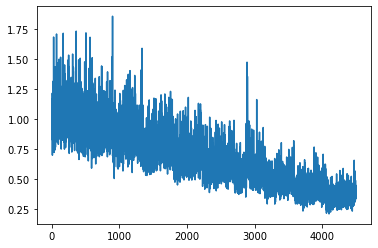

In [ ]:
loss_values = train(30)

import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.show()

In [ ]:
#model = BartForConditionalGeneration.from_pretrained(WEIGHT_PATH)

In [ ]:
#WEIGHT_PATH = PATH + 'weights/clean_T5'
#WEIGHT_PATH = PATH + 'weights/clean_bart'
#WEIGHT_PATH = PATH + 'weights/noisy_T5'
#WEIGHT_PATH = PATH + 'weights/noisy_bart'
WEIGHT_PATH = PATH + 'weights/QA_bart'

In [ ]:
#DATAPATH = PATH + 'data/clean_test.json'
DATAPATH = PATH + 'QA_data/test.json'
import torch

from transformers import BartTokenizerFast
tokenizer = BartTokenizerFast.from_pretrained('facebook/bart-base')
"""
from transformers import T5Tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-base')
"""
def get_data(path=DATAPATH):

  question_list = list()
  expo_list = list()

  with open(DATAPATH) as f:
    data = list(json.load(f))
  
  for question, expo in data:
    question_list.append(question)
    expo_list.append(expo[0])

  return question_list, expo_list
class TestDataset(torch.utils.data.Dataset):
  def __init__(self, encodings, expos, labels, length):
      self.encodings = encodings
      self.expos = expos
      self.labels = labels
      self.length = length

  def __getitem__(self, idx):
      encoding_item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
      return (encoding_item, self.labels[idx], self.expos[idx])

  def __len__(self):
      return self.length

def get_dataset(question_list, expo_list):

  expo_encodings = tokenizer(expo_list, truncation=True, padding=True)

  test_dataset = TestDataset(expo_encodings, expo_list, question_list,length = len(question_list))

  return test_dataset

In [ ]:
question_list, expo_list = get_data()
test_dataset = get_dataset(question_list, expo_list)

In [ ]:
#from transformers import T5ForConditionalGeneration
from transformers import BartForConditionalGeneration

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm

def validate(val_dataset):
    #model =  T5ForConditionalGeneration.from_pretrained(WEIGHT_PATH)
    model =  BartForConditionalGeneration.from_pretrained(WEIGHT_PATH)
    model.to(device)
    model.eval()

    val_loader = DataLoader(val_dataset, batch_size=5, shuffle=True)

    print("Evaluating on {} questions".format(len(val_dataset)))

    list_of_references = list()
    list_of_hypotheses = list()
    list_of_original = list()
    list_of_pp = list()
    list_of_generated_text = list()

    count = 0
    for batch in val_loader:
        input, label, orig = batch
        input_ids = input['input_ids'].to(device)
        attention_mask = input['attention_mask'].to(device)

        with torch.no_grad():
            generated_sequences = model.generate(
                input_ids=input_ids,
                do_sample=True,
                max_length=600,
                temperature=1.0,
                top_k=5,
                top_p=0.9,
                repetition_penalty=1.0,
                )
            #print(generated_sequences)
            #print(label)
            reference = label[0].split()

            hypothesis = list()
            for sequence in generated_sequences:
                text = tokenizer.decode(sequence, clean_up_tokenization_spaces=True)
                '''
                if text != '</s>' or text != '<s>' or text != '<pad>':
                  hypothesis += text
                '''
                text = text.replace('</s>', '')
                text = text.replace('<s>', '')
                text = text.replace('<pad>', '')
                #hypothesis.append(text)
                hypothesis = text.split()
                #print(hypothesis)
                list_of_generated_text.append(text)
                #print(hypothesis)

                #print(text)

                #perplexity
                token = tokenizer(text, return_tensors='pt')
                ppl = get_ppl(token, model)
                #print(pp_score)
                list_of_pp.append(ppl)
                # Prints out sequences
            #print(hypothesis)

            list_of_hypotheses.append(hypothesis)
            list_of_references.append([reference])
            list_of_original.append(orig)
        print(count)
        count += 1
            
    # Calculate BLEU Score
    import nltk
    score = nltk.translate.bleu_score.corpus_bleu(list_of_references, list_of_hypotheses)
    return list_of_references, list_of_hypotheses,list_of_original, score, list_of_pp, list_of_generated_text
      # import torchtext

      #   score = torchtext.data.metrics.bleu_score(candidate_corpus, references_corpus)

In [ ]:
def get_ppl(encodings, model):
  max_length = 600
  stride = 300

  lls = []
  for i in range(0, encodings.input_ids.size(1), stride):
      begin_loc = max(i + stride - max_length, 0)
      end_loc = min(i + stride, encodings.input_ids.size(1))
      trg_len = end_loc - i    # may be different from stride on last loop
      input_ids = encodings.input_ids[:,begin_loc:end_loc].to(device)
      target_ids = input_ids.clone()
      target_ids[:,:-trg_len] = -100

      with torch.no_grad():
          outputs = model(input_ids, labels=target_ids)
          log_likelihood = outputs[0] * trg_len

      lls.append(log_likelihood)

  ppl = torch.exp(torch.stack(lls).sum() / end_loc)
  return ppl

In [ ]:
list_of_references, list_of_hypotheses, list_of_original, score, list_of_pp, list_of_generated_text = validate(test_dataset)

Evaluating on 200 questions
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
print(len(list_of_pp))

200


In [ ]:
print(score)

0.01341457620976224


In [ ]:
sum = ''
print(' '.join(list_of_references[0][0]))

Last month, at your developer forum, I think in the keynote, the gentleman from the AWS gave a very constructive and positive commentary on your offerings and how they would expand that business going forward?


In [ ]:
print(list_of_references[0])

[['Last', 'month,', 'at', 'your', 'developer', 'forum,', 'I', 'think', 'in', 'the', 'keynote,', 'the', 'gentleman', 'from', 'the', 'AWS', 'gave', 'a', 'very', 'constructive', 'and', 'positive', 'commentary', 'on', 'your', 'offerings', 'and', 'how', 'they', 'would', 'expand', 'that', 'business', 'going', 'forward?']]


In [ ]:
print(list_of_pp[2])

tensor(1.7659, device='cuda:0')


In [ ]:
print(list_of_pp[45].item())

1.7167783975601196


In [ ]:
sum = 0
for i in range(len(list_of_pp)):
  
  sum += list_of_pp[i].item()
  #print(list_of_pp[i])
print(sum/300)

1.201419290304184


In [ ]:
lis_of_h = []
lis_of_r = []
for i in tqdm(range(len(list_of_hypotheses))):
  h = ' '.join(list_of_hypotheses[i])
  r = ' '.join(list_of_references[i][0])
  print(h)
  print(r)
  print("---------")
  lis_of_h.append(h)
  lis_of_r.append(r)

  0%|          | 0/40 [00:00<?, ?it/s]

And then the second question is, when you look at the investments you've made in support of the Xilinx acquisition, it seems like there's a lot of different levels of investment in support infrastructure than we've seen in the past.
Last month, at your developer forum, I think in the keynote, the gentleman from the AWS gave a very constructive and positive commentary on your offerings and how they would expand that business going forward?
---------
And then, if I could just follow-up on the Communications question, you had a really strong Investor Day, and I think at your Investor Day you kind of talked about how you're pleasantly surprised by the strength in the Communications end markets.
It might correct that in your prior guidance for the full-year, you did not include any stock buyback and now you are or might just hearing things a little confused today. And then the strategy question was the expense side, it looks like to own it is having a pretty good material impact and giving 

In [ ]:
import datasets
from datasets import load_metric
bert_score = load_metric("bertscore")
bleu = datasets.load_metric("bleu")

In [ ]:
results = bleu.compute(predictions=list_of_hypotheses, references=list_of_references, max_order = 1)
print(results["bleu"])

0.2033997655334115


In [ ]:
import bert_score
P, R, F1 = bert_score.score(lis_of_h, lis_of_r, lang='en', verbose=True, rescale_with_baseline=False)
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level Precision: {P.mean():.3f}")
print(f"System level Recall: {R.mean():.3f}")

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/2 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.60 seconds, 67.06 sentences/sec
System level F1 score: 0.847
System level Precision: 0.850
System level Recall: 0.845


In [ ]:
P, R, F1 = bert_score.score(lis_of_h, lis_of_r, lang='en', verbose=True, rescale_with_baseline=True)
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level Precision: {P.mean():.3f}")
print(f"System level Recall: {R.mean():.3f}")

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/2 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.62 seconds, 64.17 sentences/sec
System level F1 score: 0.095
System level Precision: 0.108
System level Recall: 0.079


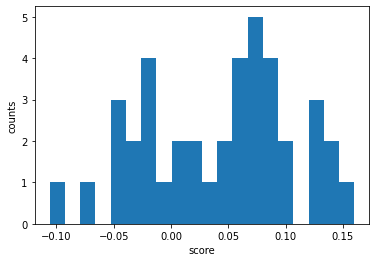

In [ ]:
import matplotlib.pyplot as plt
plt.hist(F1, bins=20)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

In [ ]:
from tqdm.notebook import tqdm
model =  BartForConditionalGeneration.from_pretrained(WEIGHT_PATH)
model.to(device)
generated_sen = []

for i in tqdm(range(0,3441)):
  sentence = data[i][1][0]
  tokenize_input = tokenizer.tokenize(sentence)
  tensor_input = torch.tensor([tokenizer.convert_tokens_to_ids(tokenize_input)]).to(device)
  a = model.generate(tensor_input,
                do_sample=True,
                max_length=600,
                temperature=1.0,
                top_k=5,
                top_p=0.9,
                repetition_penalty=1.0,
                )
  text = ''
  for w in a:
    text += tokenizer.decode(w, clean_up_tokenization_spaces=True)
  generated_sen.append(text)
  #print(text)
'''
import json
PATH = "/content/drive/MyDrive/Colab Notebooks/NLP/"
f = open(PATH + "generated_sentences.json",'w')
json.dump(generated_sen, f)

f.close()
'''

  0%|          | 0/3441 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
print(len(generated_sen))

3441


In [ ]:
print(generated_sen[7])

</s><s>Hi, good morning. Thanks for taking my question. I wanted to follow-up on OptumInsight’s operating margin guidance. So, you’re guiding to about 25% operating margin in fiscal ‘19. You’ve got OptumRx now at 20%, OptumNow at 20%. So, I’m just trying to get a sense of how much of that is coming from Optum insight versus Optum Insight? And then, my second question is just around the Optum business. I think, historically, Optum has been in the mid-single-digit operating margin range for a couple of years, but now, you are moving closer to the upper end of that range. And I was just wondering if you could give us a little bit more color on what you think is driving that relative to your long-term target of 30% to 40% operating margins? Thank you.</s>


In [ ]:
print(list_of_pp)

[tensor(3123.8684, device='cuda:0'), tensor(722.2648, device='cuda:0')]


In [ ]:
print(score)

0.293968634178725


In [ ]:
from pprint import pprint

In [ ]:
for i in range(len(list_of_references)):
  print("Original:")
  print(list_of_original[i])
  print("Ground Truth:")
  print(' '.join(list_of_references[i][0]))
  print("Generated: ")
  print(list_of_hypotheses[i])
  print("-------------------------------")

In [ ]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from tqdm.notebook import tqdm
device = 'cuda:0'
model_id = 'gpt2-large'
gpt_model = GPT2LMHeadModel.from_pretrained(model_id).to(device)
tokenizer = GPT2TokenizerFast.from_pretrained(model_id)

KeyboardInterrupt: ignored

In [ ]:
import math
import torch
!pip install pytorch_pretrained_bert
from pytorch_pretrained_bert import OpenAIGPTTokenizer, OpenAIGPTModel, OpenAIGPTLMHeadModel
# Load pre-trained model (weights)
model = OpenAIGPTLMHeadModel.from_pretrained('openai-gpt')
model.eval()
# Load pre-trained model tokenizer (vocabulary)
tokenizer = OpenAIGPTTokenizer.from_pretrained('openai-gpt')

     |████████████████████████████████| 133kB 12.0MB/s 
     |████████████████████████████████| 133kB 20.3MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 7.3MB 18.5MB/s 
ERROR: botocore 1.20.35 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


100%|██████████| 458495/458495 [00:00<00:00, 1281637.38B/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [ ]:
def score(sentence):
    tokenize_input = tokenizer.tokenize(sentence)
    tensor_input = torch.tensor([tokenizer.convert_tokens_to_ids(tokenize_input)])
    loss=model(tensor_input, lm_labels=tensor_input)
    return math.exp(loss)

a = ["i wrote a book, i wrote a book, i wrote a book, i wrote a book,i wrote a book, i wrote a book.",
   "i wrote a book.",
   "i wrote a book about the life of two young people who fall in love with each other."]
     
print([score(i) for i in a])

TypeError: ignored

In [ ]:
def pp_score(model, sentence,  mask_token_id=103):
  tensor_input = sentence
  repeat_input = tensor_input.repeat(tensor_input.size(-1)-2, 1)
  mask = torch.ones(tensor_input.size(-1) - 1).diag(1)[:-2]
  masked_input = repeat_input.masked_fill(mask == 1, 103)
  labels = repeat_input.masked_fill( masked_input != 103, -100)
  loss,_ = model(masked_input, masked_lm_labels=labels)
  result = np.exp(loss.item())
  return result